# Pandas
Pandas basic codes for practice

## 0 安装
安装方法同Numpy，可以参考Numpy笔记

## 1 Pandas快速入门学习

### 1）基本介绍

In [10]:
#生成序列
import pandas as pd
import numpy as np
s=pd.Series([1,4,6,np.nan,67,8])
s

0     1.0
1     4.0
2     6.0
3     NaN
4    67.0
5     8.0
dtype: float64

In [9]:
#生成日期序列
import pandas as pd
import numpy as np
dates=pd.date_range('20210114',periods=3)
dates

DatetimeIndex(['2021-01-14', '2021-01-15', '2021-01-16'], dtype='datetime64[ns]', freq='D')

In [8]:
#指定行列名称，生成表格
import pandas as pd
import numpy as np
dates=pd.date_range('20210114',periods=3)
df=pd.DataFrame(np.random.randn(3,4),index=dates,columns=['a','b','c','d'])#给定行和列的名称，生成随机数
df

,a,b,c,d
2021-01-14,1.748175,-0.095990,-0.240411,0.055525
2021-01-15,-0.935780,0.391609,0.648734,-0.569127
2021-01-16,-0.083766,0.597682,0.414388,0.957347


In [7]:
#不指定行列名称，生成随机数表格
import pandas as pd
import numpy as np
df=pd.DataFrame(np.arange(12).reshape((3,4))) 
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [2]:
#describe()函数
import pandas as pd
import numpy as np
df=pd.DataFrame(np.arange(12).reshape((3,4)))
df.describe()

,0,1,2,3
count,3.0,3.0,3.0,3.0
mean,4.0,5.0,6.0,7.0
std,4.0,4.0,4.0,4.0
min,0.0,1.0,2.0,3.0
25%,2.0,3.0,4.0,5.0
50%,4.0,5.0,6.0,7.0
75%,6.0,7.0,8.0,9.0
max,8.0,9.0,10.0,11.0


In [13]:
#按索引排序
import pandas as pd
import numpy as np
df=pd.DataFrame(np.arange(12).reshape((3,4)))
df.sort_index(axis=1,ascending=False)#每一行倒序

,3,2,1,0
0,3,2,1,0
1,7,6,5,4
2,11,10,9,8


In [21]:
#按变量值排序
import pandas as pd
import numpy as np
df=pd.DataFrame(np.array([1,4,3,4,8,2]).reshape((3,2)))
df.sort_values(by=1)

,0,1
2,8,2
0,1,4
1,3,4


### 2）选择数据

In [4]:
import numpy as np
import pandas as pd
dates=pd.date_range('20210118',periods=6)
df=pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
print(df)
#print(df['A'],df.B)
#用切片来选择
df[1:3]#df['20210120':'20210122']

             A   B   C   D
2021-01-18   0   1   2   3
2021-01-19   4   5   6   7
2021-01-20   8   9  10  11
2021-01-21  12  13  14  15
2021-01-22  16  17  18  19
2021-01-23  20  21  22  23


,A,B,C,D
2021-01-19,4,5,6,7
2021-01-20,8,9,10,11


In [25]:
#select by lable:loc
import numpy as np
import pandas as pd
dates=pd.date_range('20210118',periods=6)
df=pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
print(df.loc['20210119'])
print(df.loc[:,['A','C']])
print(df.loc['20210122',['A','B']])

A    4
B    5
C    6
D    7
Name: 2021-01-19 00:00:00, dtype: int32
             A   C
2021-01-18   0   2
2021-01-19   4   6
2021-01-20   8  10
2021-01-21  12  14
2021-01-22  16  18
2021-01-23  20  22
A    16
B    17
Name: 2021-01-22 00:00:00, dtype: int32


In [26]:
#select by position:iloc
import numpy as np
import pandas as pd
dates=pd.date_range('20210118',periods=6)
df=pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
print(df.iloc[3,1])
print(df.iloc[[0,2,4],1:3])

13
             B   C
2021-01-18   1   2
2021-01-20   9  10
2021-01-22  17  18


In [5]:
#Boolean indexing
import numpy as np
import pandas as pd
dates=pd.date_range('20210118',periods=6)
df=pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
print(df)
df[df.A>8]

             A   B   C   D
2021-01-18   0   1   2   3
2021-01-19   4   5   6   7
2021-01-20   8   9  10  11
2021-01-21  12  13  14  15
2021-01-22  16  17  18  19
2021-01-23  20  21  22  23


,A,B,C,D
2021-01-21,12,13,14,15
2021-01-22,16,17,18,19
2021-01-23,20,21,22,23


### 3) 设置值

In [10]:
import numpy as np
import pandas as pd
dates=pd.date_range('20210118',periods=6)
df=pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
df.iloc[2,2]=111
df.loc['20210118','C']=233
df.A[df.A>2]=2
df['F']=np.nan
df['E']=pd.Series([1,2,3,4,5,6],index=pd.date_range('20210118',periods=6))
print(df)

            A   B    C   D   F  E
2021-01-18  0   1  233   3 NaN  1
2021-01-19  2   5    6   7 NaN  2
2021-01-20  2   9  111  11 NaN  3
2021-01-21  2  13   14  15 NaN  4
2021-01-22  2  17   18  19 NaN  5
2021-01-23  2  21   22  23 NaN  6


### 4) 处理丢失数据

In [17]:
import numpy as np
import pandas as pd
dates=pd.date_range('20210118',periods=6)
df=pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
df.iloc[0,1]=np.nan
df.iloc[1,2]=np.nan
print(df)
print(df.dropna(axis=1,how='any'))#how={'any','all'}
print(df.fillna(value=0))#填入数字
print(df.isnull())#判断是否有缺失数据
print(np.any(df.isnull())==True)#至少有一个数据丢失，就会返回True

             A     B     C   D
2021-01-18   0   NaN   2.0   3
2021-01-19   4   5.0   NaN   7
2021-01-20   8   9.0  10.0  11
2021-01-21  12  13.0  14.0  15
2021-01-22  16  17.0  18.0  19
2021-01-23  20  21.0  22.0  23
             A   D
2021-01-18   0   3
2021-01-19   4   7
2021-01-20   8  11
2021-01-21  12  15
2021-01-22  16  19
2021-01-23  20  23
             A     B     C   D
2021-01-18   0   0.0   2.0   3
2021-01-19   4   5.0   0.0   7
2021-01-20   8   9.0  10.0  11
2021-01-21  12  13.0  14.0  15
2021-01-22  16  17.0  18.0  19
2021-01-23  20  21.0  22.0  23
                A      B      C      D
2021-01-18  False   True  False  False
2021-01-19  False  False   True  False
2021-01-20  False  False  False  False
2021-01-21  False  False  False  False
2021-01-22  False  False  False  False
2021-01-23  False  False  False  False
True


### 5）导入导出数据

In [1]:
import pandas as pd
#data=pd.read_excel('123.xlsx')
data=pd.read_csv('Test.csv')
data
#data.to_pickle('Test.pickle')

,成绩加权排名,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,
0,该成绩排序仅供参考，不作评选依据！,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,排名,学号,加权成绩,学分绩点（满分4分）,参与加权课程总学分,参与加权的课程门数,排名维度（站位）,不及格门数（参考）,算术平均分,推免绩点参考,NaN
2,1,22920192204097,91.1818,3.9455,44,15,1%,0(0),267.4667,3.9455,NaN
3,2,21620192203320,92.6739,3.9348,46,17,2%,0(0),250.7647,3.9348,NaN
4,3,22920192203897,93.0682,3.9091,44,15,3%,0(0),273,3.9091,NaN
5,4,30220182201087,90.2432,3.8946,37,16,4%,0(0),208.6875,3.8946,NaN
6,5,22920192203962,91.0889,3.8867,45,16,5%,0(0),256.1875,3.8867,NaN
7,6,22920192204109,90.0889,3.8867,45,16,6%,0(0),253.375,3.8867,NaN
8,7,22920192203972,91.5,3.8773,44,15,7%,0(0),268.4,3.8773,NaN
9,8,33120182202165,91.2286,3.8771,35,14,8%,0(0),228.0714,3.8771,NaN


### 6) 合并concat

In [34]:
#concatenating
import pandas as pd
import numpy as np
df1=pd.DataFrame(np.ones((3,4))*0,columns=['a','b','c','d'])
df2=pd.DataFrame(np.ones((3,4))*1,columns=['a','b','c','d'])
df3=pd.DataFrame(np.ones((3,4))*2,columns=['a','b','c','d'])
print(df1)
print(df2)
print(df3)
res=pd.concat([df1,df2,df3],axis=0,ignore_index=True)#纵向合并,忽略原来的行名称
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [43]:
#join,['inner','outer']
import pandas as pd
import numpy as np
df1=pd.DataFrame(np.ones((3,4))*0,columns=['a','b','c','d'],index=[1,2,3])
df2=pd.DataFrame(np.ones((3,4))*1,columns=['b','c','d','e'],index=[2,3,4])
print(df1)
print(df2)
res=pd.concat([df1,df2],join='inner',ignore_index=True)
res2=pd.concat([df1,df2],join='outer',sort=True)
print(res)
print(res2)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0
     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


In [2]:
#join_axes
import pandas as pd
import numpy as np
df1=pd.DataFrame(np.ones((3,4))*0,columns=['a','b','c','d'],index=[1,2,3])
df2=pd.DataFrame(np.ones((3,4))*1,columns=['b','c','d','e'],index=[2,3,4])
res=pd.concat([df1,df2],axis=1,join_axes=[df1.index])#按照df1的index合并
print(df1)
print(df2)
res

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


,a,b,c,d,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [57]:
#append
import pandas as pd
import numpy as np
df1=pd.DataFrame(np.ones((3,4))*0,columns=['a','b','c','d'])
df2=pd.DataFrame(np.ones((3,4))*1,columns=['a','b','c','d'])
df3=pd.DataFrame(np.ones((3,4))*1,columns=['b','c','d','e'],index=[2,3,4])
res=df1.append([df2,df3],ignore_index=True,sort=True)
print(res)
s1=pd.Series([1,2,3,4],index=['a','b','c','d'])
res2=df1.append(s1,ignore_index=True,sort=True)
print(res2)

     a    b    c    d    e
0  0.0  0.0  0.0  0.0  NaN
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  1.0  1.0  1.0  1.0  NaN
4  1.0  1.0  1.0  1.0  NaN
5  1.0  1.0  1.0  1.0  NaN
6  NaN  1.0  1.0  1.0  1.0
7  NaN  1.0  1.0  1.0  1.0
8  NaN  1.0  1.0  1.0  1.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


### 7) 合并merge

In [61]:
#mergeing two df by key
import pandas as pd
import numpy as np
left=pd.DataFrame({'Key':['K0','K1','K2','K3'],'A':['A0','A1','A2','A3'],'B':['B0','B1','B2','B3']})
right=pd.DataFrame({'Key':['K0','K1','K2','K3'],'C':['C0','C1','C2','C3'],'D':['D0','D1','D2','D3']})
print(left)
print(right)
res=pd.merge(left,right,on='Key')#基于Key这一列
print(res)

  Key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  Key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3
  Key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [69]:
#consider two keys
import pandas as pd
import numpy as np
left=pd.DataFrame({'Key1':['K0','K0','K1','K2'],'Key2':['K0','K1','K0','K1'],'A':['A0','A1','A2','A3'],'B':['B0','B1','B2','B3']})
right=pd.DataFrame({'Key1':['K0','K1','K1','K2'],'Key2':['K0','K0','K0','K0'],'C':['C0','C1','C2','C3'],'D':['D0','D1','D2','D3']})
print(left)
print(right)
#how=['left','right','inner','outer']
res=pd.merge(left,right,on=['Key1','Key2'],how='left')#找两个关键词相同的一行合并,默认inner
print(res)

  Key1 Key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  Key1 Key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3
  Key1 Key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN


In [72]:
#indicator
df1=pd.DataFrame({'col1':[0,1],'col_left':['a','b']})
df2=pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
print(df1)
print(df2)
res=pd.merge(df1,df2,on='col1',how='outer',indicator=True)#默认是False
print(res)
res2=pd.merge(df1,df2,on='col1',how='outer',indicator='indicator_column')#重命名
print(res2)

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     2          2
   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only
   col1 col_left  col_right indicator_column
0     0        a        NaN        left_only
1     1        b        2.0             both
2     2      NaN        2.0       right_only
3     2      NaN        2.0       right_only


In [75]:
#merged by index
left=pd.DataFrame({'A':['A0','A1','A2'],'B':['B0','B1','B2']},index=['K0','K1','K2'])
right=pd.DataFrame({'C':['C0','C1','C2'],'D':['D0','D1','D2']},index=['K0','K2','K3'])
print(left)
print(right)
res=pd.merge(left,right,left_index=True,right_index=True,how='outer')
print(res)
res2=pd.merge(left,right,left_index=True,right_index=True,how='inner')
print(res2)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C1  D1
K3  C2  D2
      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C1   D1
K3  NaN  NaN   C2   D2
     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C1  D1


In [81]:
#handle overlapping
#将原表格中名称相同的列重命名
import pandas as pd
boys=pd.DataFrame({'k':['k0','k1','k2'],'age':[1,2,3]})
girls=pd.DataFrame({'k':['k0','k0','k3'],'age':[4,5,6]})
print(boys)
print(girls)
res=pd.merge(boys,girls,on='k',suffixes=['_boy','_girl'],how='outer')
print(res)

    k  age
0  k0    1
1  k1    2
2  k2    3
    k  age
0  k0    4
1  k0    5
2  k3    6
    k  age_boy  age_girl
0  k0      1.0       4.0
1  k0      1.0       5.0
2  k1      2.0       NaN
3  k2      3.0       NaN
4  k3      NaN       6.0


### 8）plot画图

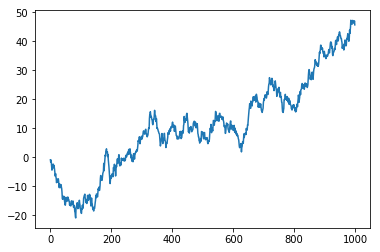

In [83]:
#Series数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.Series(np.random.randn(1000),index=np.arange(1000))
data=data.cumsum()
plt.figure()
data.plot()
plt.show()

          A         B         C         D
0  0.263204 -0.698042 -1.317971 -0.168989
1  0.757983 -2.348717 -1.686551  0.093833
2 -0.158212 -2.403777 -2.796474  0.200448


<Figure size 432x288 with 0 Axes>

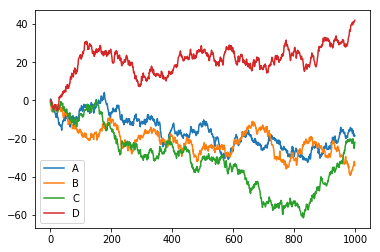

In [90]:
#DataFrame数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.DataFrame(np.random.randn(1000,4),index=np.arange(1000),columns=list('ABCD'))
data=data.cumsum()
print(data.head(3))
plt.figure()
data.plot()
plt.show()

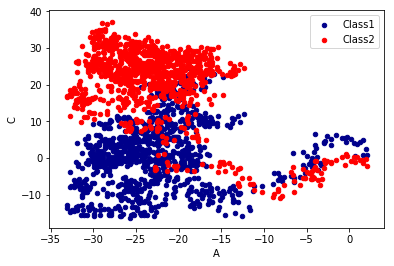

<Figure size 432x288 with 0 Axes>

In [92]:
#plot methods:‘bar’,'hist','box','kde','area','scatter','hexbin','pie'
#plt.scatter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.DataFrame(np.random.randn(1000,4),index=np.arange(1000),columns=list('ABCD'))
data=data.cumsum()
ax=data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')
data.plot.scatter(x='A',y='C',color='Red',label='Class2',ax=ax)
plt.figure()
plt.show()

## 2 pandas的数据结构

### 1) Series

+ Series是一种类似于一维数组的对象，它由一组数据（各种NumPy数据类型）以及索引组成。

Series的索引在左边，值在右边。

In [96]:
import pandas as pd
obj=pd.Series([4,6,5,-8])
print(obj)
print(obj.values)
print(obj.index)

0    4
1    6
2    5
3   -8
dtype: int64
[ 4  6  5 -8]
RangeIndex(start=0, stop=4, step=1)


+ 使创建的Series带有一个可以对各个数据点进行标记的索引

In [101]:
import pandas as pd
obj2=pd.Series([2,4,6,7],index=['a','b','c','d'])
print(obj2)
print(obj2.index)

a    2
b    4
c    6
d    7
dtype: int64
Index(['a', 'b', 'c', 'd'], dtype='object')


+ 可以通过索引的方式选取Series中的单个或一组值

In [106]:
import pandas as pd
obj2=pd.Series([2,4,6,7],index=['a','b','c','d'])
print(obj2['a'])
print(obj2[['b','c','d']])

2
b    4
c    6
d    7
dtype: int64


+ 还可以将Series看成一个定长的有序字典

In [107]:
import pandas as pd
obj2=pd.Series([2,4,6,7],index=['a','b','c','d'])
'2'in obj2

False

+ isnull和notnull函数用于检测缺失数据

In [109]:
import pandas as pd
obj2=pd.Series([2,4,6,7],index=['a','b','c','d'])
print(pd.isnull(obj2))
print(pd.notnull(obj2))

a    False
b    False
c    False
d    False
dtype: bool
a    True
b    True
c    True
d    True
dtype: bool


### 2) DataFrame

+ DataFrame是一个表格型的数据结构，可以看做由Series组成的字典，既有行索引也有列索引。

In [111]:
#最常用的建立方式是直接传入一个由等长列表或NumPy数组组成的字典
import pandas as pd
data={'state':['one','two','three'],'year':[2001,2002,2001],'pop':[1.2,3.4,5.6]}
frame=pd.DataFrame(data)
frame

,state,year,pop
0,one,2001,1.2
1,two,2002,3.4
2,three,2001,5.6


+ 对于特别大的DataFrame，head可以选取前五行。如果指定了列序列，则DataFrame的列就会按照指定顺序进行排列。

In [118]:
import pandas as pd
data={'s':['one','two','three'],'y':[2001,2002,2001],'p':[1.2,3.4,5]}
frame=pd.DataFrame(data,columns=['y','p','s'])
frame

,y,p,s
0,2001,1.2,one
1,2002,3.4,two
2,2001,5.0,three


+ del用来删除列

In [122]:
import pandas as pd
data={'s':['one','two','three'],'y':[2001,2002,2001],'p':[1.2,3.4,5]}
frame=pd.DataFrame(data,columns=['y','p','s'],index=[5,6,7])
del frame['y']
frame

,p,s
5,1.2,one
6,3.4,two
7,5.0,three


## 3 基本功能

### 1）重新索引

+ reindex的作用是创建一个新对象，它的数据符合新的索引。

In [124]:
import pandas as pd
obj=pd.Series([4,7,9,0],index=['d','b','c','a'])
print(obj)
obj2=obj.reindex(['a','b','c','d','e'])
print(obj2)

d    4
b    7
c    9
a    0
dtype: int64
a    0.0
b    7.0
c    9.0
d    4.0
e    NaN
dtype: float64


+ 插值处理，运用method，使用ffill可以实现前向值填充

In [128]:
import pandas as pd
obj=pd.Series(['blue','yellow','red'],index=[0,3,4])
print(obj)
obj.reindex(range(6),method='ffill')

0      blue
3    yellow
4       red
dtype: object


0      blue
1      blue
2      blue
3    yellow
4       red
5       red
dtype: object

### 2) 丢弃指定轴上的项

使用drop函数

+ 对于Series

In [4]:
import pandas as pd
import numpy as np
obj=pd.Series(np.arange(5.),index=['a','b','c','d','e'])
print(obj)
new_obj=obj.drop(['d','c'])
print(new_obj)

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64
a    0.0
b    1.0
e    4.0
dtype: float64


+ 对于DataFrame

In [17]:
import pandas as pd
import numpy as np
data=pd.DataFrame(np.arange(16).reshape((4,4)),index=['A','B','C','D'],columns=['one','two','three','four'])
print(data)
data2=data.drop(['one','two'],axis=1)
print(data2)
data3=data.drop(['A','C'])
print(data3)
data.drop('A',inplace=True)#原地修改
print(data)

   one  two  three  four
A    0    1      2     3
B    4    5      6     7
C    8    9     10    11
D   12   13     14    15
   three  four
A      2     3
B      6     7
C     10    11
D     14    15
   one  two  three  four
B    4    5      6     7
D   12   13     14    15
   one  two  three  four
B    4    5      6     7
C    8    9     10    11
D   12   13     14    15


### 3）索引、选取和过滤

+ Series

利用标签的切片，其末端是包含的

In [20]:
import pandas as pd
import numpy as np
obj=pd.Series(np.arange(4.),index=['a','b','c','d'])
print(obj)
print(obj['b':'c'])
obj['b':'c']=5
print(obj)

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64
b    1.0
c    2.0
dtype: float64
a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64


### 4) 在算术方法中填充值

In [27]:
import numpy as np
import pandas as pd
df1=pd.DataFrame(np.arange(12.).reshape((3,4)),columns=list('abcd'))
df2=pd.DataFrame(np.arange(20.).reshape((4,5)),columns=list('abcde'))
df2.loc[1,'b']=np.nan
print(df1)
print(df2)
print(df1+df2)#直接相加时，没有重叠的地方就会产生NA值
df1.add(df2,fill_value=0)#使用add方法

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0
      a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   NaN   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0
      a     b     c     d   e
0   0.0   2.0   4.0   6.0 NaN
1   9.0   NaN  13.0  15.0 NaN
2  18.0  20.0  22.0  24.0 NaN
3   NaN   NaN   NaN   NaN NaN


,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [30]:
import numpy as np
import pandas as pd
df1=pd.DataFrame(np.arange(12.).reshape((3,4)),columns=list('abcd'))
df2=pd.DataFrame(np.arange(20.).reshape((4,5)),columns=list('abcde'))
print(df1)
df1.reindex(columns=df2.columns,fill_value=0)

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0


,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


### 5) DataFrame和Series之间的运算

+ 默认情况下，DataFrame和Series之间的算术运算会将Series的索引默认匹配到DataFrame的列，然后沿行一直向下广播

In [32]:
import pandas as pd
import numpy as np
frame=pd.DataFrame(np.arange(12.).reshape((4,3)),index=['Utah','Ohio','Texas','Oregon'],columns=['b','d','e'])
series=frame.iloc[0]
print(frame)
print(series)

          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64


### 6）函数应用和映射

+ 将函数应用到由各列或行所形成的一维数组上

In [4]:
import numpy as np
import pandas as pd
f=lambda x:x.max()-x.min()
frame=pd.DataFrame(np.random.randn(4,3),index=['one','two','three','four'],columns=['a','b','c'])
print(frame)
print(frame.apply(f))
frame.apply(f,axis='columns')

              a         b         c
one    0.990970 -0.075049  0.144510
two   -1.099700  1.283812 -0.645189
three -1.154337  0.209332 -1.707189
four   0.616025  0.222704 -0.405932
a    2.145308
b    1.358860
c    1.851699
dtype: float64


one      1.066019
two      2.383511
three    1.916521
four     1.021957
dtype: float64

+ 传递到apply的函数不是必须返回一个标量，还可以返回由多个值组成的Series

In [6]:
import numpy as np
import pandas as pd
def f(x):
    return pd.Series([x.min(),x.max()],index=['min','max'])
frame=pd.DataFrame(np.random.randn(4,3),index=['one','two','three','four'],columns=['a','b','c'])
frame.apply(f)

,a,b,c
min,-0.359965,-1.432722,-1.582760
max,1.153909,0.463912,0.426922


### 7) 排序和排名

+ 使用Sort_index方法，它将返回一个已排序的新对象

In [10]:
import numpy as np
import pandas as pd
obj=pd.Series(range(4),index=['d','a','b','c'])
print(obj)
obj.sort_index()

d    0
a    1
b    2
c    3
dtype: int64


a    1
b    2
c    3
d    0
dtype: int64

+ 对于DataFrame,可以根据任意一个轴上的索引进行排序

In [15]:
import numpy as np
import pandas as pd
frame=pd.DataFrame(np.arange(8).reshape((2,4)),index=['three','one'],columns=['d','a','b','c'])
print(frame)
print(frame.sort_index())
print(frame.sort_index(axis='columns'))
print(frame.sort_index(axis=1,ascending=False))

       d  a  b  c
three  0  1  2  3
one    4  5  6  7
       d  a  b  c
one    4  5  6  7
three  0  1  2  3
       a  b  c  d
three  1  2  3  0
one    5  6  7  4
       d  c  b  a
three  0  3  2  1
one    4  7  6  5


+ 若要按值对Series进行排序，可使用sort_values,缺失默认值会被放到末尾

In [19]:
import numpy as np
import pandas as pd
obj=pd.Series([4,np.nan,-3,2])
print(obj)
obj.sort_values()

0    4.0
1    NaN
2   -3.0
3    2.0
dtype: float64


2   -3.0
3    2.0
0    4.0
1    NaN
dtype: float64

+ 当排序一个DataFrame时，根据其中一个或多个列中的值进行排序

In [23]:
import numpy as np
import pandas as pd
frame=pd.DataFrame({'b':[4,7,-3,2],'a':[0,1,0,1]})
print(frame)
print(frame.sort_values(by=['a','b']))

   b  a
0  4  0
1  7  1
2 -3  0
3  2  1
   b  a
2 -3  0
0  4  0
3  2  1
1  7  1


## 4 最后

如果想要查看详细讲解视频，请点击<https://mofanpy.com/tutorials/data-manipulation/np-pd/>

注明：本文档由Jupyter Notebook编辑并导出，每个代码块下方是运行结果，可供参考。